<a href="https://colab.research.google.com/github/Sreeja0522/Data-Analytics-Project---Pollution-Dataset/blob/main/Plan%26Analyze1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PLAN :**

**Objective**:  
The goal of this project is to predict air quality levels across various regions based on environmental and demographic factors. The predictions will help identify regions at high risk of pollution, allowing authorities to prioritize mitigation efforts.

**Problem Definition**:  
- Air quality levels vary across regions due to environmental factors like temperature, humidity, and industrial proximity. The dataset contains key features that influence air quality, and the objective is to predict air quality levels (poor, moderate, good) based on these features.
- The stakeholders (Environmental Protection Agency, local authorities) need a predictive model and actionable recommendations to reduce air pollution in the most impacted regions.

**Key Questions**:  
- How do environmental and demographic factors affect air quality in different regions?  
- Can we build a predictive model that classifies air quality levels accurately based on available data?  
- What actions should authorities take to improve air quality in high-risk regions?

**Deliverables**:  
- A predictive machine learning model for air quality classification.  
- Data visualizations and insights on the correlation between factors and air quality.  
- Actionable recommendations for air quality improvement.

---


# **ANALYZE : Dataset Analysis Using Python**

# Step 1. Imports


*   Import packages
*   Load dataset



In [1]:
#Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#For displaying all of the columns
pd.set_option('display.max_columns',None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree


**Load Dataset**

Pandas is used to read the dataset called pollution_dataset.csv

In [11]:
# Load dataset into a dataframe
df = pd.read_csv("pollution_dataset.csv")  # Relative path
   # or
# Display first few rows of the dataframe
df.head()


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


# Step 2: Data Exploration


*   Understand variables
*   Clean the dataset(missing data, redundant data, outliers)



In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


Gather descriptive statistics about the data

In [13]:
df.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


Rename columns for ease:

In [14]:
#Displaying columns
df.columns

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality'],
      dtype='object')

In [19]:
df=df.rename(columns={'Proximity_to_Industrial_Areas':'Industry_prox',})
df.columns

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Industry_prox', 'Population_Density', 'Air Quality'],
      dtype='object')

Check for missing values

In [20]:
# Check for missing values
df.isnull().sum()

,0
Temperature,0
Humidity,0
PM2.5,0
PM10,0
NO2,0
SO2,0
CO,0
Industry_prox,0
Population_Density,0
Air Quality,0


There are no missing values in this dataset


**Checking for Duplicates**

In [21]:
# Check for duplicates
df.duplicated().sum()

0

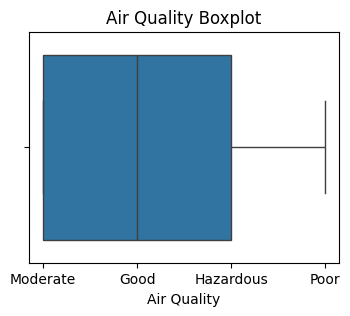

In [25]:
# Create a boxplot to visualize distribution of `Air Quality` and detect any outliers
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['Air Quality'])
plt.title('Air Quality Boxplot')
plt.xlabel('Air Quality')
plt.show()

The boxplot indicates no outliers, as all data points fall within the whiskers, suggesting the dataset is free from extreme deviations and is relatively consistent within the interquartile range and the calculated bounds (Q1 - 1.5×IQR to Q3 + 1.5×IQR).
